#Importing Required Libraries

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Dataset

In [3]:
# Load the dataset
file_path = "/content/Life_Expectancy_Data.csv"
df = pd.read_csv(file_path)

# Display first few rows
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


#Understanding the Data

In [4]:
# Check dataset shape
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

# Check column data types
print("\nColumn Data Types:")
print(df.dtypes)

# Check for missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())

Dataset contains 2938 rows and 22 columns.

Column Data Types:
Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                         

#Handling Missing Values

In [6]:
# Drop columns with excessive missing values (if any)
df = df.dropna(thresh=len(df) * 0.8, axis=1)  # Drop columns where more than 20% values are missing

# Fill missing numerical values with the median of the column
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df.loc[:, col] = df[col].fillna(df[col].median())

# Fill missing categorical values with the mode (most frequent value)
for col in df.select_dtypes(include=['object']).columns:
    df.loc[:, col] = df[col].fillna(df[col].mode()[0])

# Verify that there are no missing values
print("\nMissing Values After Preprocessing:")
print(df.isnull().sum().sum())  # Should print 0



Missing Values After Preprocessing:
0


#Encoding Categorical Variables

In [7]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Use Label Encoding for categorical variables
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders for later use

In [9]:
print(df.columns)

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')


#Splitting Features and Target Variable

In [11]:
# Define features (X) and target variable (y)
X = df.drop(columns=["Life expectancy "])  # Features
y = df["Life expectancy "]  # Target variable

# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Building the Regression Model

In [12]:
# Define the neural network model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Single neuron for regression output
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#Training the Model

In [13]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 4331.2861 - mae: 64.7006 - val_loss: 709.6897 - val_mae: 23.3078
Epoch 2/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 391.7965 - mae: 16.3155 - val_loss: 133.9013 - val_mae: 8.9668
Epoch 3/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 156.3232 - mae: 9.8967 - val_loss: 100.4620 - val_mae: 7.7369
Epoch 4/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 126.5838 - mae: 9.0308 - val_loss: 81.4831 - val_mae: 7.0508
Epoch 5/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 107.5672 - mae: 8.2376 - val_loss: 68.9696 - val_mae: 6.5705
Epoch 6/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 96.5604 - mae: 7.7784 - val_loss: 62.6359 - val_mae: 6.2467
Epoch 7/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 88.1794 - mae: 7.5455 - val_loss: 54.6516 - val_mae: 5.7628
Epoch 8/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 77.9390 - mae: 6.9774 - val_loss: 46.2077 - val_mae: 5.3410
Epoch 9/100
147/147

#Evaluating the Model

In [14]:
# Evaluate model performance
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"\nTest MAE: {test_mae:.4f}")


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.0326 - mae: 2.0984  

Test MAE: 1.9902


#Making Predictions

In [15]:
# Predict values
y_pred = model.predict(X_test)

# Convert predictions to a 1D array
y_pred = y_pred.flatten()

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


#Performance Metrics

In [16]:
# Calculate Regression Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"\nPerformance Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


Performance Metrics:
Mean Absolute Error (MAE): 1.9902
Mean Squared Error (MSE): 7.4953
Root Mean Squared Error (RMSE): 2.7378
R² Score: 0.9135


#Visualizing Predictions vs. Actual Values

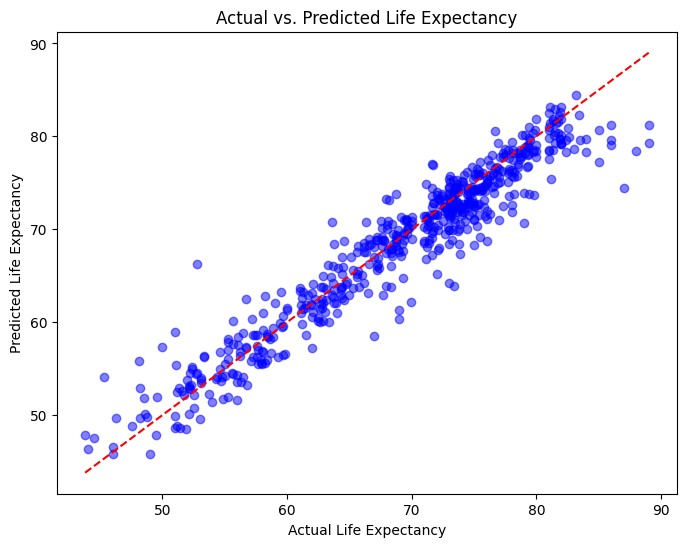

In [17]:
# Plot Actual vs. Predicted Values
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')  # Identity line
plt.xlabel("Actual Life Expectancy")
plt.ylabel("Predicted Life Expectancy")
plt.title("Actual vs. Predicted Life Expectancy")
plt.show()

#Visualizing Model Training Progress

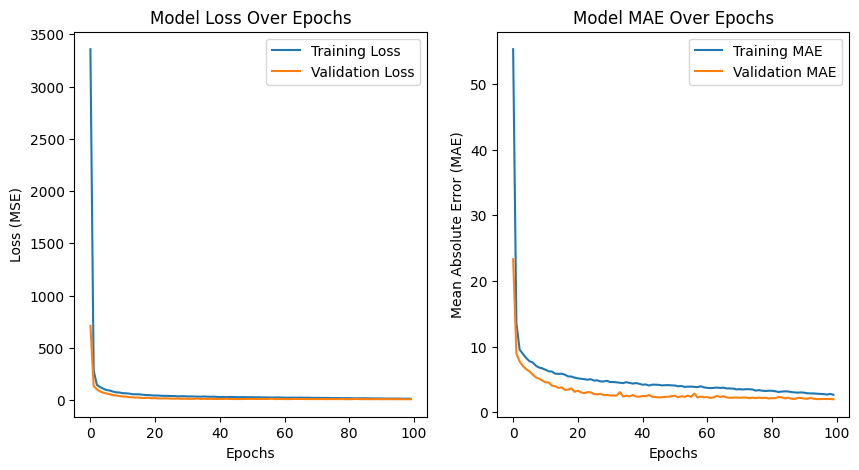

In [18]:
# Plot Training & Validation Loss
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.title('Model Loss Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend()
plt.title('Model MAE Over Epochs')

plt.show()


#Computing Additional Regression Metrics

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict on the test set
y_pred = model.predict(X_test).flatten()

# Compute metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Display results
print(f"\n📌 Model Performance Metrics:")

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

📌 Model Performance Metrics:


In [20]:
print(f"Mean Absolute Error (MAE): {mae:.4f}")

Mean Absolute Error (MAE): 1.9902


In [21]:
print(f"Mean Squared Error (MSE): {mse:.4f}")

Mean Squared Error (MSE): 7.4953


In [22]:
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Root Mean Squared Error (RMSE): 2.7378


In [23]:
print(f"R² Score: {r2:.4f}")  # R² Score indicates how well the model explains variance

R² Score: 0.9135
